# Project 2: Analyzing Instacart Customer Data

In this project, we will be importing and cleaning data from Kaggle that Instacart uploaded in 2017. This cleaned data will be used to understand Instacart's customer behaviors of when they make purchases, how often they make purchases, what days of the week, and what products are being purchased.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the datasets
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Analyze your data
In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content. 

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage. 
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [3]:
# orders summary
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# products summary
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# departments summary
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# aisles summary
aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# order_products summary
order_products.info()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


##  Find and remove missing value and duplicate rows
### Orders DataFrame

In [8]:
# Count missing values
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [9]:
# Count missing value where its not customer's 1st order
non_first_order = orders['days_since_prior_order'] > 1
non_first_order.isna().sum()

0

We determine there are no missing values where it's not a customer's first order by using the isna() and sum() functions after grouping order_number with more than one order.

In [10]:
# Find duplicate rows in orders
orders.duplicated().sum()

15

In [11]:
# Drop duplicate rows
orders.drop_duplicates(inplace=True)

In [12]:
# Check again for duplicates
orders.duplicated().sum()

0

There were 15 duplicated lines so we dropped them so they will not alter our data.

### Products DataFrame

In [13]:
# Count missing values
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [14]:
#Stores all missing product name rows in nan_name
nan_name = products[products['product_name'].isna()]
nan_name

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [15]:
# Check if all missing product names are associated with aisle 100 and department 21
nan_name_id = nan_name[nan_name['aisle_id']!=100]
nan_name_id

,product_id,product_name,aisle_id,department_id


In [16]:
nan_name_dep = nan_name[nan_name['department_id']!=21]
nan_name_dep

,product_id,product_name,aisle_id,department_id


In [17]:
# Find the names for aisle 100 and department 21
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [18]:
departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


In [19]:
# Fill missing names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

In [20]:
products['product_name'].isna().sum()

0

In [21]:
products.duplicated().sum()

0

In this section we found that there was 1258 missing values in the 'product_name' column so we replaced the missing names with 'Unknown'. There were also no duplicated lines.

### Departments DataFrame

In [22]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [23]:
departments.duplicated().sum()

0

### Aisles DataFrame

In [24]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [25]:
aisles.duplicated().sum()

0

There are no missing values or duplicated rows in the aisles dataframe.

### Order_products DataFrame

In [26]:
order_products.info(show_counts=True)
order_products.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
363173,75663,18531,8.0,1
1463306,1832233,46026,2.0,1
517148,3404613,10831,18.0,1
537248,2628068,9387,2.0,1
769601,1417578,5449,4.0,1
141593,1045330,44683,5.0,1
4305265,215955,10863,8.0,1
1585416,1731190,37121,17.0,0
1226765,2038885,24561,1.0,0
3129268,2528452,16910,23.0,0


In [27]:
# Checks for missing values
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [28]:
# Finds missing values 
missing_value = order_products[order_products['add_to_cart_order'].isna()]
missing_value

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [29]:
# Saves missing values id
missing_cart_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique().tolist()
missing_cart_ids

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1564093,
 129627,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2094761,
 1038146,
 2997021,
 813364,
 2256933,
 171934,
 2409109,
 1730767,
 1169835,
 733526,
 404157,
 3125735,
 747668,
 1800005,
 1961723,
 871281,
 388234,
 1648217,
 1477139,
 102236,
 1021563,
 1832957,
 2721963,
 678116,
 1220886,
 1673227,
 2999801,
 1633337,
 2470674,
 2625444,
 1677118,
 2479011,
 3383594,
 1183255,
 1713430,
 2652650,
 1598369,
 1916118,
 854647,
 1302315,
 888470,
 180546,
 2621907,
 1308785,
 2729254,
 9310,
 2170451,
 2979697,
 1625713,
 1529171]

In [30]:
# Creates a new dataframe with IDs from the missing value rows
filtered_df = order_products[order_products['order_id'].isin(missing_cart_ids)]
filtered_df

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [31]:
# Group this new dataframe by order ID and check sizes of those groups - to find minimum size
group_sizes = filtered_df.groupby('order_id').size()
group_sizes

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

In [32]:
# Do all orders with missing values have more than 64 products?
min_group_size = group_sizes.min()

print(min_group_size)

65


In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

This section saves all order IDs with atleast one missing value and add them to the 'add_to_cart_order'. We then change the missing values to 999 and convert the column to integer.

# [A] Easy (must complete all to pass)

#  [A1] Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).

In [34]:
invalid_hour_of_day = orders[~orders['order_hour_of_day'].between(0, 23)]
invalid_hour_of_day

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [35]:
invalid_dow = orders[~orders['order_dow'].between(0, 6)]
invalid_dow

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


We can confirm from this code that that the order hour of day is a valid time of day and the order day of week is a valid day in the week.

#  [A2] How many people place orders for each hour of the day?


In [36]:
# Aggregate data by hour of day
hourly_counts = orders['order_hour_of_day'].value_counts().sort_index()
hourly_counts

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

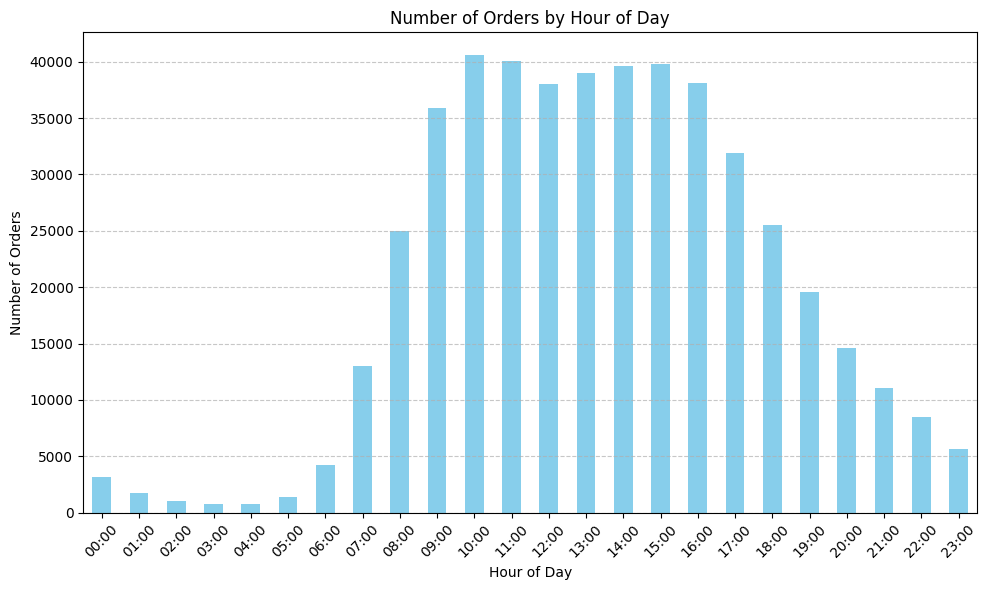

In [37]:
# Plot the data
plt.figure(figsize=(10,6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

According to the chart, you can see most of the orders occur between 8:00 and 18:00 during the day.

#  [A3] What day of the week people shop for groceries?


In [38]:
# Aggregate data by 'order_dow'
dow_counts = orders['order_dow'].value_counts().sort_index()
dow_counts

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

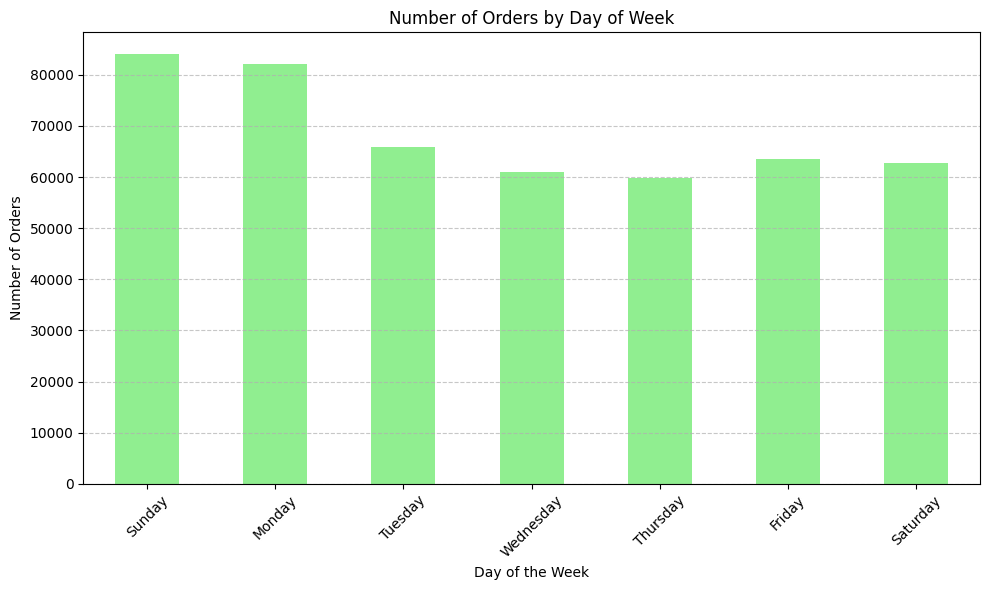

In [39]:
# Map day of the week numbers to names
dow_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_counts.index = [dow_names[i] for i in dow_counts.index]

# Plot the data
plt.figure(figsize=(10, 6))
dow_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
         
plt.show()

According to the chart you can see that the days with the most number of orders occur on Sunday and Monday, with the most being on Sunday.

#  [A4] How long people wait until placing their next order? Comment on the minimum and maximum values.

In [40]:
# Finds the days between orders and drops rows with missing values if it is their first order
days = orders['days_since_prior_order'].dropna().values

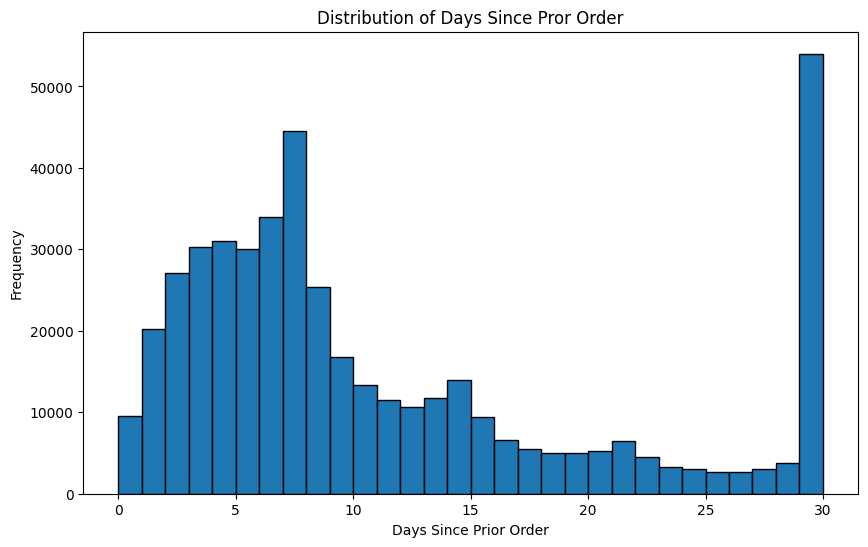

In [41]:
# Plotting the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(days, bins=30, edgecolor='black')
plt.title('Distribution of Days Since Pror Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')

plt.show()

According to the graph, the majority of people wait 2-10 days to order again. The data is skewed to the right which means the mean is greater than the median. As well as an outlier which will increase the mean.

The minimum value is 26 and 27 days and the maximum value is 30 days. This could be a monthly subscrition every day that people order automatically on day 30 or it could be that everyday over 30 days in the data is marked as 30 days.

# [B] Medium (must complete all to pass)

# [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [42]:
orders['order_dow']

0         6
1         5
2         5
3         0
4         4
         ..
478962    1
478963    3
478964    2
478965    3
478966    1
Name: order_dow, Length: 478952, dtype: int64

In [43]:
# Split orders data into Wednesday and Saturday
orders_wednesday = orders[orders['order_dow'] == 3]
orders_saturday = orders[orders['order_dow'] == 6]

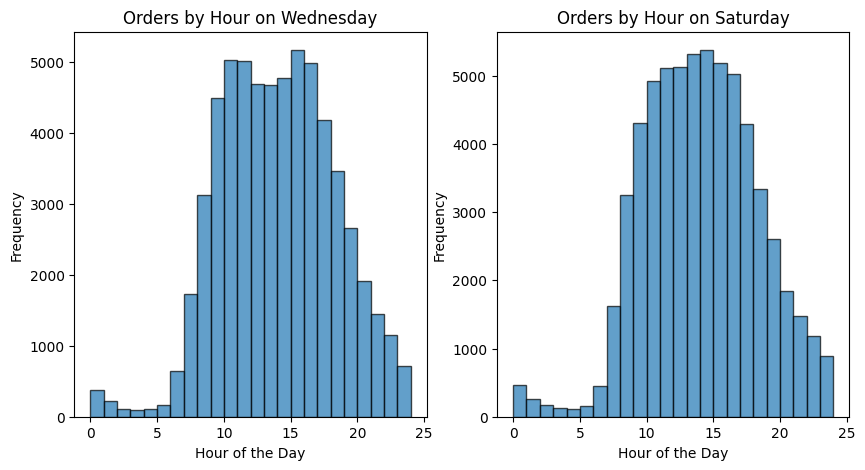

In [44]:
# Plotting the histograms using wednesday orders
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(orders_wednesday['order_hour_of_day'], bins=range(25), edgecolor='black', alpha=0.7)
plt.title('Orders by Hour on Wednesday')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')


# Plotting the histograms using saturday orders
plt.subplot(1, 2, 2)
plt.hist(orders_saturday['order_hour_of_day'], bins=range(25), edgecolor='black', alpha=0.7)
plt.title('Orders by Hour on Saturday')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.show()

The peak hours on Wednesday and Saturday are similar from 800 to 1800. The difference is on saturday there are more orders placed at the peak then there is on wednesday.

# [B2] What's the distribution for the number of orders per customer?

(e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

In [45]:
# Groups by customers and counts how many times they have ordered
orders_per_customer = orders.groupby('user_id').size()

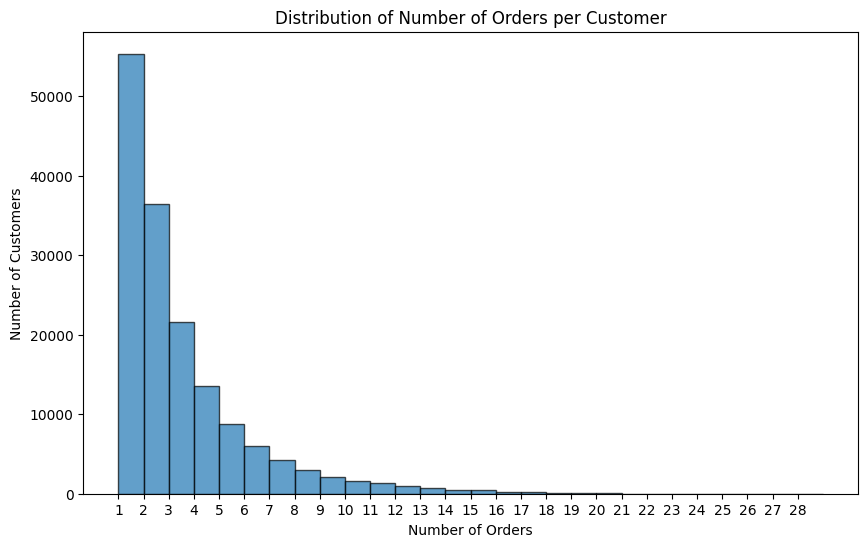

In [46]:
# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 2), edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(range(1, orders_per_customer.max() + 1))
plt.show()

The distribution shows the number of orders per person and we can see that the number of customers gets smaller the more someone orders.

# [B3] What are the top 20 popular products (display their id and name)?

In [47]:
# Count number of orders each product is included in
product_order_count = order_products.groupby('product_id')['order_id'].nunique()
product_order_count

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64

In [48]:
# Sort by descending order
product_order_count_sorted = product_order_count.sort_values(ascending=False)
product_order_count_sorted

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
5836         1
43573        1
43570        1
36174        1
41403        1
Name: order_id, Length: 45573, dtype: int64

In [49]:
# Get top 20 products
top_products = product_order_count_sorted.nlargest(20).reset_index()
top_products

,product_id,order_id
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [50]:
# Merge top products with their product names from the product dataframe
top_products_details = top_products.merge(products, on='product_id')
top_products_details

,product_id,order_id,product_name,aisle_id,department_id
0,24852,66050,Banana,24,4
1,13176,53297,Bag of Organic Bananas,24,4
2,21137,37039,Organic Strawberries,24,4
3,21903,33971,Organic Baby Spinach,123,4
4,47209,29773,Organic Hass Avocado,24,4
5,47766,24689,Organic Avocado,24,4
6,47626,21495,Large Lemon,24,4
7,16797,20018,Strawberries,24,4
8,26209,19690,Limes,24,4
9,27845,19600,Organic Whole Milk,84,16


In [51]:
# Display only their product id and name
top_products = top_products_details[['product_id', 'product_name']]
top_products

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,47626,Large Lemon
7,16797,Strawberries
8,26209,Limes
9,27845,Organic Whole Milk


In the above code, we count the number of orders a product has been ordered in order_products, sort them in descending order, and then merge the product_id column with the product_name column in products dataframe to get the product names based on their id number.

# [C] Hard (must complete at least two to pass)

# [C1] How many items do people typically buy in one order? What does the distribution look like?

In [53]:
# Calculate the number of items per order
items_per_order = order_products.groupby('order_id').size()
items_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64

In [55]:
items_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64

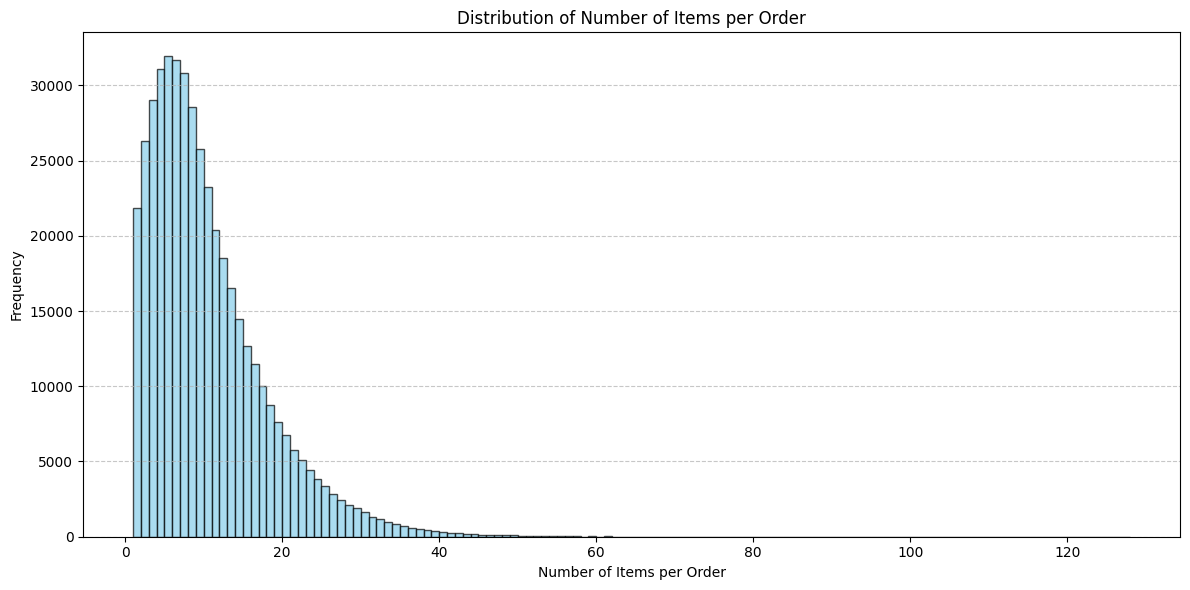

In [57]:
# Plot distribution of the number of items per order
plt.figure(figsize=(12, 6))
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 2), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The average number of items in an order is 10. The majority of the data is within 1 to 20 items per order. There is an extreme outlier at 127 items in an order.

# [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [62]:
# Filter for reorder items in order_products
reordered = order_products[order_products['reordered'] > 0]
reordered

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [69]:
# Count the number of reorders per product
reorder_counts = reordered['product_id'].value_counts().reset_index()
reorder_counts.columns = ['product_id', 'reorder_count']

In [70]:
# Merge with product details to get product names
top_reordered_products = pd.merge(reorder_counts, products, on='product_id')
top_reordered_products

,product_id,reorder_count,product_name,aisle_id,department_id
0,24852,55763,Banana,24,4
1,13176,44450,Bag of Organic Bananas,24,4
2,21137,28639,Organic Strawberries,24,4
3,21903,26233,Organic Baby Spinach,123,4
4,47209,23629,Organic Hass Avocado,24,4
...,...,...,...,...,...
36223,2591,1,500 mg Vitamin C caplets,47,11
36224,29201,1,Pretzels Sesame Baked Not Fried,107,19
36225,27154,1,Ultimates Chocolate Pecan Deluxe Cookie Dough,105,13
36226,10789,1,Pure Aloe Whole Leaf Juice with Lemon,77,7


In [71]:
# Select the top 20 products
top_20_reordered = top_reordered_products.head(20)

# Display the top 20 reordered products with their id and name
print("Top 20 Reordered Products:")
print(top_20_reordered[['product_id', 'product_name']])

Top 20 Reordered Products:
    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        27845        Organic Whole Milk
7        47626               Large Lemon
8        27966       Organic Raspberries
9        16797              Strawberries
10       26209                     Limes
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       49683            Cucumber Kirby
15       28204        Organic Fuji Apple
16        8277  Apple Honeycrisp Organic
17       39275       Organic Blueberries
18        5876             Organic Lemon
19       49235       Organic Half & Half


The above code sorts the product list into a reordered list in descending order and then matches the product id with the products name.

## 📊 Final Conclusion: Instacart Customer Behavior Insights

After cleaning and analyzing Instacart's 2017 customer data, several important trends and behaviors were uncovered that provide valuable insight into how, when, and what customers order:

### 🕐 Ordering Patterns
- **Peak Shopping Hours**: The majority of customers place orders between **8:00 AM and 6:00 PM**, with a clear peak in the late morning and early afternoon.
- **Popular Days**: **Sundays and Mondays** see the highest number of orders, indicating that customers are likely preparing for the upcoming week.

### ⏱️ Frequency of Orders
- Most customers reorder groceries **every 2 to 10 days**, with a notable number also reordering exactly every **30 days**, possibly indicating **monthly subscription patterns** or restocking routines.
- The number of **orders per customer** shows that while many users are occasional shoppers, a strong core of loyal users place multiple repeat orders.

### 📦 Order Size
- On average, a customer buys **around 10 items per order**.
- Most orders contain **between 5 and 15 items**, though some can contain over 100 items, suggesting usage for both small household needs and large restocks.

### 🛒 Product Preferences
- The most frequently ordered and reordered products include essentials like **bananas**, **organic strawberries**, and **organic whole milk**, highlighting a strong preference for **fresh and organic products**.
- The **top 20 reordered products** suggest customers tend to stick with preferred brands or staple goods, reflecting habits and brand loyalty.

### 🧠 Behavioral Differences by Day
- On **Saturdays**, there are slightly more orders during peak hours compared to **Wednesdays**, possibly due to weekend shopping routines.
- While both days show similar peak times, **Saturday** has higher volume, which may help in planning promotions or staffing.

---

### 📌 Recommendations:
1. **Target promotions on Sundays and Mondays** to maximize impact.
2. **Encourage reorders** between the 5–10 day window using personalized reminders.
3. **Highlight popular and frequently reordered items** on the homepage or in marketing emails.
4. **Offer loyalty incentives** to encourage one-time shoppers to return and build habits.

These insights help Instacart better understand customer behavior and can be used to **optimize marketing strategies, improve customer retention, and enhance user experience**.

